# Algoritmo Harris Corner Detection

En este cuaderno exploraremos el algoritmo Harris, t√©cnica usada para la detecci√≥n de esquinas en im√°genes de una manera efectiva y sencilla computacionalmente. EL metodo se nombre como un descriptor, proporcionando puntos relevantes de cada imagen. Su uso extendido es debido a su simplicidad, efectivida y poco coste computacional. 

A lo largo de este cuaderno veremos paso a paso su funcionamiento y la base de su efectividad.

### Paso1: Cargar y mostrar la imagen de ejemplo

Antes de comenzar, debemos importar las librer√≠as necesarias, cargar la imagen con la que vamos a trabajar y mostrarla para comprobar que la carga ha sido efectiva. Aunque trabajaremos con la imagen en escala de grises, vamos a mostrarla en color.

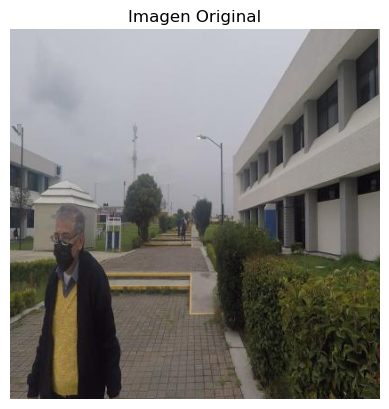

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import algoritmos.harris as hs

img = cv2.imread('../src/images/test/GOPR0141_MP4-195_jpg.rf.5ed66cd884da63e15b570f0db8d88740.jpg',cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('../src/images/test/GOPR0141_MP4-195_jpg.rf.5ed66cd884da63e15b570f0db8d88740.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")
plt.show()

### Paso 2: Convertir la imagen a escala de grises

Aunque ya hemos cargado la imagen en la variable `img` en escala de grises, vamos a explicar el motivo. Lo que percibimos como bordes o esquinas no es m√°s que simples variaciones drasticas de intensidad. Esto aparece reflejado en la matriz de intensidad en RGB o cualquier  espacio de color. Adem√°s es muy √∫til por las siguientes cuestiones:

- **Reducci√≥n de complejidad:** Al eliminar el resto de informaci√≥n, reducimos la complejidad sin perder la informaci√≥n estructural que buscamos.
- **Eficiencia computacional:** Al trabajar con un solo canal en lugar de tres, se reduce la carga computacional dr√°sticamente
- **Detecci√≥n de caracter√≠sticas:** Los cambios en intensidad es la base de la detecci√≥n de esquinas en este algoritmo y, el canal que mas informaci√≥n mantiene acerca de los cambios en intensidad, es el gris

Mostramos a continuaci√≥n la imagen en escala de grises con la que vamos a trabajar. La imagen proviene de un banco de imagen de dominio p√∫blico y, su elecci√≥n, ha sido meramente azar.

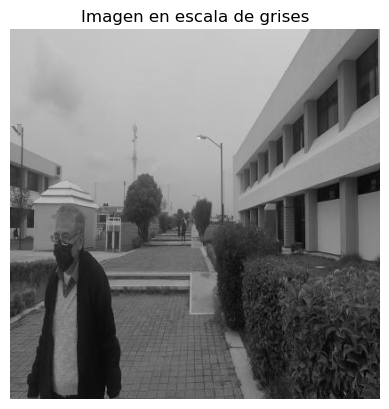

In [2]:

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen en escala de grises")
plt.axis("off")
plt.show()


# Paso 3: Configuraci√≥n del constructor Harris

En este paso definimos los par√°metros que va a usar el algoritmo:

- **gaussbox:** Es el tama√±o del kernel usado en el filtro Gaussiano.
- **k:** Es un par√°metro de control muy importante. Su valor debe oscilar entre 0.4 y 0.6. El par√°metro k controla la sensibilidad al tipo de caracter√≠stica que se est√° detectando:
    - Valores bajos de k (~0.04):
        - Favorece la detecci√≥n de esquinas claramente definidas.
        - Menos sensible a ruido.
    - Valores altos de k (~0.15):
        - Hace que la funci√≥n sea m√°s sensible a bordes y texturas.
        - Aumenta el riesgo de falsas detecciones debido al ruido. 
- **threshold:** Es el valor umbral usado para mantener las esquinas m√°s relevantes. En nuestro caso un 5%.
- **window_size:** Es el tama√±o del kernel que barre toda la imagen en supresi√≥n de no m√°ximos.

Posteriormente, se crea el objeto Harris utilizando la clase definida en el m√≥dulo `algoritmos/Harris.py`.

In [3]:
gaussbox=3
k=0.04
threshold=0.05
window_size=5

algo_hs = hs.harris_detect(gaussbox,k,threshold,window_size)

Vamos a explicar el procedimiento que sigue el algoritmo de manera general, y luego lo explicaremos m√°s en detalle. Nos gustar√≠a que este quedara bien explicado y para ello creemos que es conveniente una explicaci√≥n general, seguida de una m√°s detallada en los proximos pasos.

- **1. Cargamos imagen en escala de grises.**
- **2. Calculamos sus gradientes x e y con un filtro.**
- **3. Calculamos el producto de sus gradientes.**
- **4. Aplicamos un filtro gaussiano a los gradientes.**
- **5. Aplicamos la f√≥rmula que computa las notas Harris.**
- **6. Normalizamos y aplicamos el umbral establecido.**
- **7. Realizamos supresi√≥n de no m√°ximos.**

Estos son los pasos del algoritmo.

---

# Paso 4: Calculamos el gradiente de la imagen

Nuestro objetivo final es obtener lo que matem√°ticamente se dice autovectores. Estos nos indican cuanto y en que direcci√≥n var√≠a el dato. En la siguiente imagen podemos ver como var√≠a el valor de estos vectores.

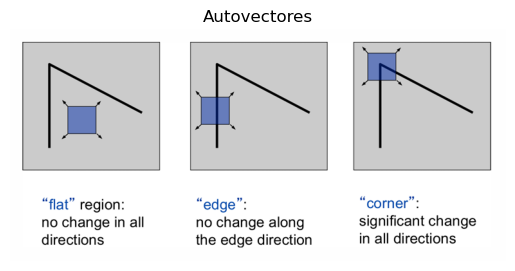

In [4]:
auto = cv2.imread('../src/images/notebook/auto.png',cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(auto, cv2.COLOR_BGR2RGB))
plt.title("Autovectores")
plt.axis("off")
plt.show()

Para el calculo de dichos autovectores debemos satisfacer la siguiente ecuaci√≥n:

$$
A¬∑x = Œªx
$$

Donde:
- $A$ es la matriz de autocorrelaci√≥n de la imagen.
- $x$ es nuestra matriz de autovectores.
- $Œª$ es llamado autovalor, es decir cuanto aumenta en cada dirreci√≥n el autovector.

Para una matrix $n$ x $n$ existen $n$ autovectores y autovalores.

Los autovalores se obtienen resolviendo:

$$
det(ùê¥‚àíùúÜùêº) =0
$$

$$
det(ùê¥ ‚àíùúÜùêº) = det(\begin{bmatrix}
ùëé_{11}‚àíùúÜ  , ùëé_{12} \\ 
ùëé_{21}  , ùëé_{22}‚àíùúÜ 
\end{bmatrix}) = 0
$$

$$
(ùëé_{11}‚àíùúÜ)(ùëé_{22}‚àíùúÜ)-ùëé_{12}ùëé_{21} = 0
$$

Como es un polinomia de grado 2 podemos obtener f√°cilmente las respuestas:

$$
ùúÜ_{max} = \frac{1}{2}  (ùëé_{11} + ùëé_{22} + \sqrt{4ùëé_{12}ùëé_{21}+(ùëé_{11} - ùëé_{22})^2})
$$

$$
ùúÜ_{min} = \frac{1}{2}  (ùëé_{11} + ùëé_{22} - \sqrt{4ùëé_{12}ùëé_{21}+(ùëé_{11} - ùëé_{22})^2})
$$

Definimos ahora la f√≥rmula para calcular las notas Harris (Harris and Stephens, 1988) de cada pixel

$$
f(x, y) = ùúÜ_{min}ùúÜ_{max} - Œ∫(ùúÜ_{min}+ùúÜ_{max})^2
$$

Nota: El valor **Œ∫** corresponde al valor **k** en la declaraci√≥n del constructor

Afotunadamente el valor Harris se puede calcular de esta otra manera:

$$
f(x, y) = det(A) ‚àí Œ∫ tr(A)^2 = a_{11} a_{22} ‚àí a_{12} a_{21} ‚àí Œ∫ (a_{11} + a_{22})^2
$$

Lo cual es mucho m√°s sencillo y obtenible mediante filtros gradientes como el sobel

---

Una vez explicado la base matem√°tica del algoritmo, realizamos el calculo del gradiente:

$$
‚àáf(ùë•, ùë¶) = \begin{bmatrix}\frac{\partial f(ùë•,ùë¶)}{\partial(ùë•)}, \frac{\partial f(ùë•,ùë¶)}{\partial(ùë¶)}\end{bmatrix}
$$ 

Ya que el calculo este tambi√©n es relativamente complejo y costoso podemos realizar que:

$$
 FiltroSobel \approx ‚àáf(ùë•, ùë¶) = \begin{bmatrix}\frac{\partial f(ùë•,ùë¶)}{\partial(ùë•)}, \frac{\partial f(ùë•,ùë¶)}{\partial(ùë¶)}\end{bmatrix} = \begin{bmatrix}Ix ,Iy\end{bmatrix}  
$$

Nota: el resultado es en realidad una matriz con fx e fy, pero se ha cambiado a Ix e Iy por simplicidad.

El m√©todo **calc_grad** aplica un filtro sobel en cada una de las direcciones x e y. Aplicamos el dicho m√©todo y obtenemos los siguientes resultados. El resultado no es m√°s que una matriz Ix e Iy con el gradiente de cada pixel.

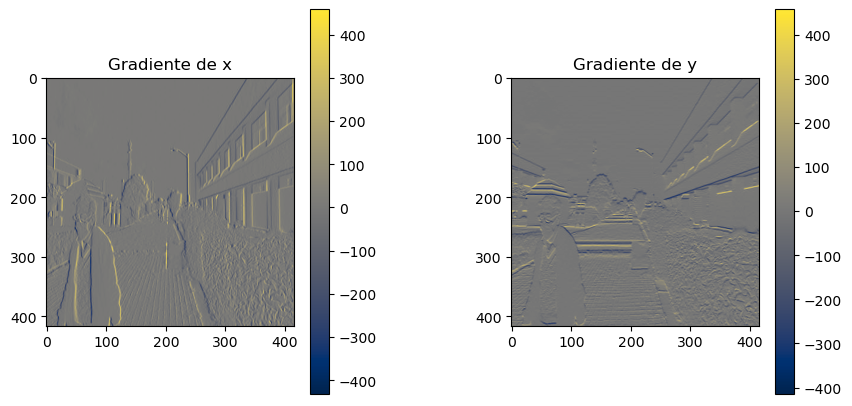

In [5]:
Ix, Iy = algo_hs.calc_grad(img)

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(Ix, cmap='cividis') 
plt.colorbar()
plt.title("Gradiente de x")

plt.subplot(1,2,2)
plt.imshow(Iy, cmap='cividis') 
plt.colorbar()
plt.title("Gradiente de y")

plt.subplots_adjust(wspace=0.5)
plt.show()

# Paso 5: Calculamos la matriz de autocorrelaci√≥n

El calculo de dicha matriz se computa:

$$
A = \sum_{x,y}{w(x,y)}\begin{bmatrix}Ix^2 , Ixy \\ 
                    Ixy, Iy^2 \end{bmatrix}
 
$$

Para evitarnos usar la funci√≥n ventana w(x,y), y aprovechando de que ya poseemos los valores Ix e Iy, simplemente obtenemos sus productos. La funci√≥n calc_grad_prod se encarga de computar el producto de Ix e Iy. el resultado es el mostrado en los mapas de calor.

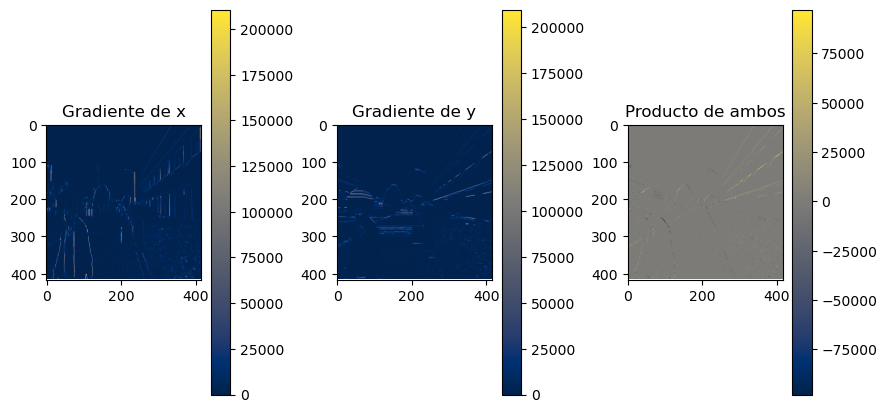

In [6]:
Ix2, Iy2, Ixy = algo_hs.calc_grad_prod(Ix,Iy)

plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.imshow(Ix2, cmap='cividis') 
plt.colorbar()
plt.title("Gradiente de x")

plt.subplot(1,3,2)
plt.imshow(Iy2, cmap='cividis') 
plt.colorbar()
plt.title("Gradiente de y")

plt.subplot(1,3,3)
plt.imshow(Ixy, cmap='cividis') 
plt.colorbar()
plt.title("Producto de ambos")

plt.subplots_adjust(wspace=0.5)
plt.show()



# Paso 6: Aplicar un suavizado Gaussiano

El siguiente paso es aplicar un filtro gaussiano para suavizar los bordes y obtener mejores resultados. La funci√≥n gauss_filter realiza este trabajo. Se utilizar√° como tama√±o de kernel el establecido en el constructor (3x3).

- **Objetivo:** El suavizado se usa principalmente para eliminar el ruido de la imagen y, as√≠, evitar que dicho ruido puede llegar a ser percibido como esquina relevante 

Podemos apreciar como se distinguen claramente los bordes del fondo de la imagen.

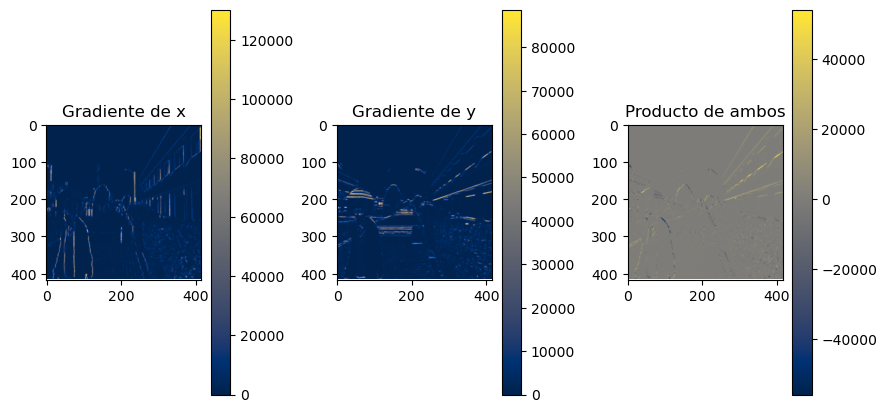

In [7]:
Ix2, Iy2, Ixy = algo_hs.gauss_filter(Ix2, Iy2, Ixy)

plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.imshow(Ix2, cmap='cividis') 
plt.colorbar()
plt.title("Gradiente de x")

plt.subplot(1,3,2)
plt.imshow(Iy2, cmap='cividis') 
plt.colorbar()
plt.title("Gradiente de y")

plt.subplot(1,3,3)
plt.imshow(Ixy, cmap='cividis') 
plt.colorbar()
plt.title("Producto de ambos")

plt.subplots_adjust(wspace=0.5)
plt.show()


# Paso 7: Calculamos la nota Harris para cada pixel

Como ya sabemos, la nota Harris para cada pixel (x,y) viene dada por la siguiente f√≥rmula:

$$
f(x, y) = det(A) ‚àí Œ∫ tr(A)^2
$$

La funci√≥n que computa dicha f√≥rmula es calc_harris_score, la cual recibe el producto de los gradientes y computa eficientemente dicha nota para cada pixel. Esta nota refleja cuanto "esquina" es un pixel, a mayor nota, mayor relevancia como esquina.

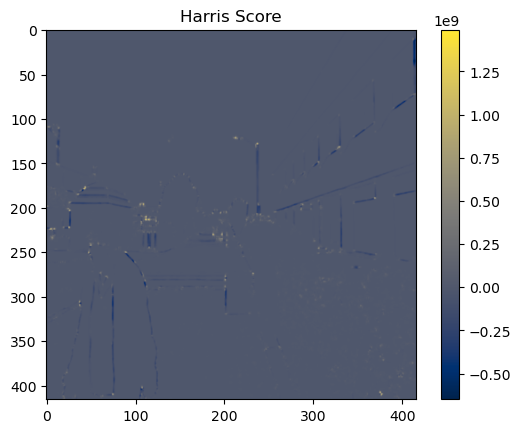

In [8]:
R = algo_hs.calc_harris_score(Ix2, Iy2, Ixy)

plt.imshow(R, cmap='cividis') 
plt.colorbar()
plt.title("Harris Score")
plt.show()

# Paso 8: Normalizamos y aplicamos un umbral

EL siguiente paso es normalizar en un rango [0,255] para trabajar de manera m√°s c√≥moda, y aplicamos el umbral establecido en el constructor de la clase (normalmente el umbral oscila entre 5%-10%). La clase que computa este caculo es normalize_thresh.

- **1¬∫.** Aplica el umbral. Mantiene a todos los pixel que son mayores que el umbral (Umbral es Max(Notas Harris)*threshold). Esto descarta gran parte de los puntos, ya que como hemos visto antes, existe una gran disparidad de notas entre los que son concebidos como "esquinas" y los que no.
- **2¬™.** Normaliza en el rango de [0,255]. Aplica norm_type=cv2.NORM_MINMAX.


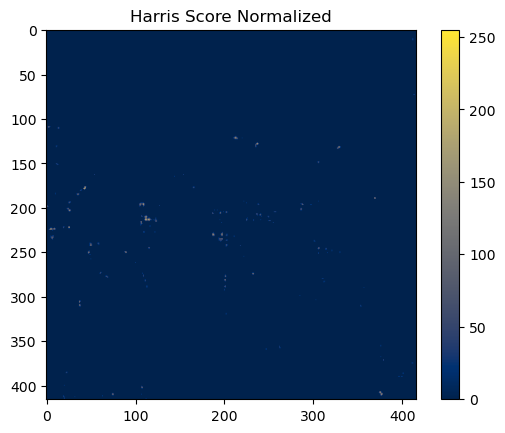

In [9]:
R_norm = algo_hs.normalize_thresh(R)

plt.imshow(R_norm, cmap="cividis") 
plt.colorbar()
plt.title("Harris Score Normalized")
plt.show()

# Paso 8: Aplicar supresi√≥n de no maximos

Por √∫ltimo, debemos aplicar supresi√≥n de no m√°ximos paro s√≥lo mantener a las esquinas con mayor nota.
Supresi√≥n de no m√°ximos consiste en aplicar a la matriz de notas, una funcion ventana que oscila en cada uno de los p√≠xeles, y compara si el valor del p√≠xel central es el mayor de entre sus vecinos.

Expl√≠quemoslo con m√°s detalle:

- Una ventana de tama√±o `window_size` recorre por cada p√≠xel de la imagen
- Esta comprueba si el p√≠xel central es el mayor de sus vecinos
- En el caso que s√≠ lo sea, se a√±ade dicho valor a una matriz resultado final. Esto se hace para comparar adecuadamente todos los pixeles con sus vecinos.
- El resultado final es una matriz que contiene solo los p√≠xeles aceptados por la supresi√≥n

Este paso permite extraer s√≥lo aquellos p√≠xeles que son los que tiene mayor nota en su vecindario, y por lo tanto, lo que son m√°s suceptibles a ser esquinas viables.

La funci√≥n draw_corner recibe la matriz final y la recorre. En el caso que el valor de dicha matriz sea distinta a 0, es decir, es una esquina v√°lida, esta dibuja un c√≠rculo rojo para poder localizarla m√°s facilmente.

In [10]:
corners = algo_hs.non_max_supre(R_norm)
img2 = algo_hs.draw_corner(corners,img)


# Resultado Final

El resultado final es la imagen original con las esquinas que ha detectado el algoritmo. Este resultado es un descriptor de la imagen y puede ser usado como preprocesamiento de IA para problemas de clasificaci√≥n y regresi√≥n.

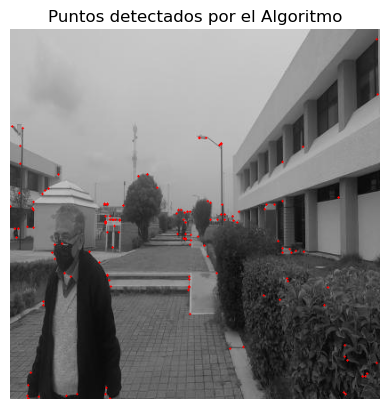

In [11]:
algo_hs.draw_img(img2, 'off')